Installing dependencies.

In [29]:
%pip install pennylane
%pip install qiskit
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Importing libraries.

In [30]:
import pennylane as qml

import qiskit

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Defining inital differential equation and variables.

In [43]:
u0 =1
l_const = 8
k_const = 0.1

max_t = 0.9

# Definition of the differential equation (DE)
def diff_eq(du, u, t, k, l):
  return du + l*u*(k + np.tan(l*t))

# Returns the value of the constant c using the initial condition, defining the exact solution to the DE.
def initial_condition(u0, t, k, l):
  const = u0 - np.exp(-k*l*t)*np.cos(l*t)
  return const

print(initial_condition(u0, 0, k_const, l_const))

# Definition of exact solution to the DE given particular u(0)
def particular_sol(t, k = k_const, l = l_const):
   c = initial_condition(u0, 0, k_const, l_const)
   return np.exp(-k*l*t)*np.cos(l*t) + c


0.0


now that our DE has a particular solution derived, we can try and solve it using euler's method (first-order runge-kutta method)

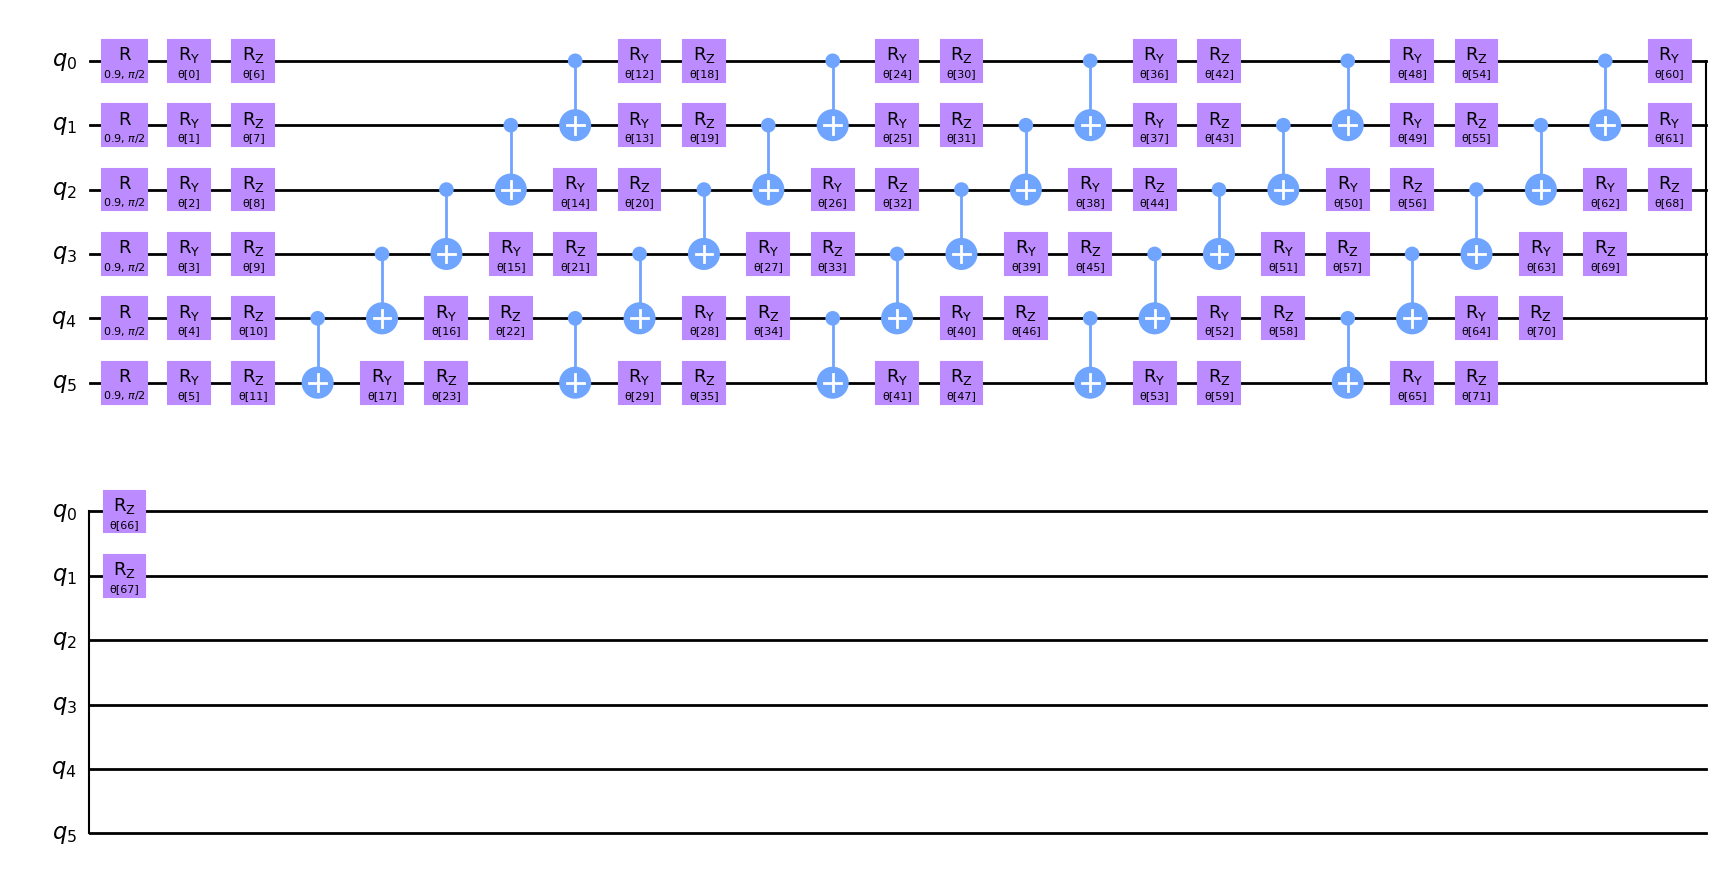

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import EfficientSU2

# Define amount of qubits used
n_qubits = 6
# Inititate circuit
qc = QuantumCircuit(n_qubits)

# Define product feature map (PFM)
def product_feature_map(t):
    for i in range(n_qubits):
        qc.ry(t, i)


# Give an arbitrary value to the PFM to check the circuit
product_feature_map(0.9)

# Implement desired ansatz
ansatz = EfficientSU2(n_qubits, reps=5)

# Compose circuit with hardware efficient ansatz
qc.compose(ansatz, inplace=True)
# Decompose circuit to see the gates
qc.decompose().draw(output='mpl', style='clifford')

In [67]:
# Check amount of parameters
qc.num_parameters

72